# Data 8: Lab 4 Discussion

## Visualizations

In [10]:
import numpy as np
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [4]:
base_dir = "../" # Set file path to import data
pokemon_table = Table.read_table(base_dir+'data/pokemon.csv')
pokemon_table

name,pokedex_number,type1,type2,abilities,generation,is_legendary,base_total,capture_rate,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,classfication,defense,experience_growth,height_m,hp,japanese_name,percentage_male,sp_attack,sp_defense,speed,weight_kg
Bulbasaur,1,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,318,45,1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,49,5120,70,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,88.1,65,65,45,6.9
Ivysaur,2,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,405,45,1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,62,5120,70,Seed Pokémon,63,1059860,1,60,Fushigisouフシギソウ,88.1,80,80,60,13
Venusaur,3,grass,poison,"['Overgrow', 'Chlorophyll']",1,0,625,45,1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,100,5120,70,Seed Pokémon,123,1059860,2,80,Fushigibanaフシギバナ,88.1,122,120,80,100
Charmander,4,fire,nan,"['Blaze', 'Solar Power']",1,0,309,45,0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,52,5120,70,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,88.1,60,50,65,8.5
Charmeleon,5,fire,nan,"['Blaze', 'Solar Power']",1,0,405,45,0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,64,5120,70,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,88.1,80,65,80,19
Charizard,6,fire,flying,"['Blaze', 'Solar Power']",1,0,634,45,0.25,1,1,2,0.5,0.5,0.5,1,1,0.25,0,1,1,1,1,4,0.5,2,104,5120,70,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,88.1,159,115,100,90.5
Squirtle,7,water,nan,"['Torrent', 'Rain Dish']",1,0,314,45,1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,48,5120,70,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,88.1,50,64,43,9
Wartortle,8,water,nan,"['Torrent', 'Rain Dish']",1,0,405,45,1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,63,5120,70,Turtle Pokémon,80,1059860,1,59,Kameilカメール,88.1,65,80,58,22.5
Blastoise,9,water,nan,"['Torrent', 'Rain Dish']",1,0,630,45,1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,103,5120,70,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,88.1,135,115,78,85.5
Caterpie,10,bug,nan,"['Shield Dust', 'Run Away']",1,0,195,255,1,1,1,1,1,0.5,2,2,1,0.5,0.5,1,1,1,1,2,1,1,30,3840,70,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,50,20,20,45,2.9


### Scatter Plot

2 numerical variables

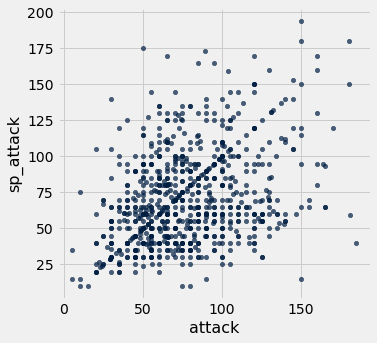

In [11]:
pokemon_table.scatter('attack','sp_attack')

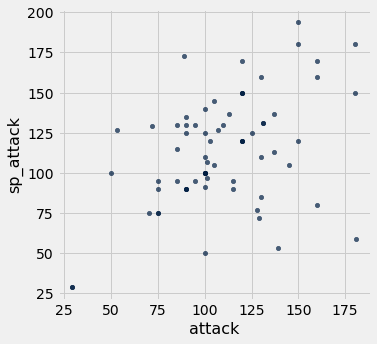

In [17]:
pokemon_table.where('is_legendary',are.equal_to(1)).scatter('attack','sp_attack')

### Line Plot

One numerical variable over time

In [23]:
average_bst_by_generation = pokemon_table.select(['generation','base_total']).group('generation',np.mean)
average_bst_by_generation

generation,base_total mean
1,416.252
2,413.18
3,420.022
4,451.178
5,427.038
6,437.611
7,448.163


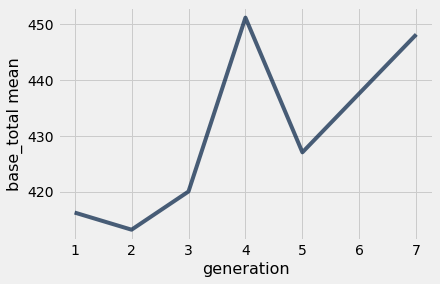

In [26]:
average_bst_by_generation.plot('generation','base_total mean')

### Bar Plot

In [27]:
average_bst_by_type = pokemon_table.select(['type1','base_total']).group('type1',np.mean)
average_bst_by_type

type1,base_total mean
bug,380.431
dark,449.759
dragon,522.778
electric,436.154
fairy,427.167
fighting,414.821
fire,450.635
flying,453.333
ghost,434.704
grass,412.577


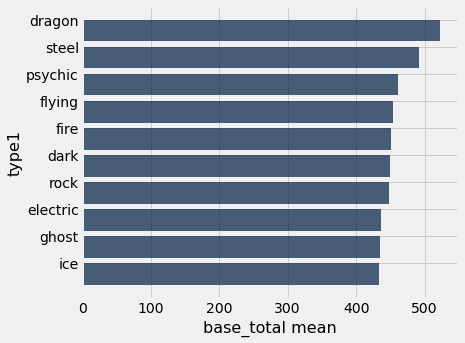

In [34]:
average_bst_by_type.sort('base_total mean', descending=True).take(np.arange(10)).barh('type1','base_total mean')

### Histograms

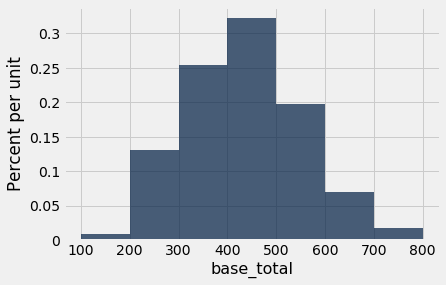

In [46]:
pokemon_table.hist('base_total', bins=np.arange(100,801,100))

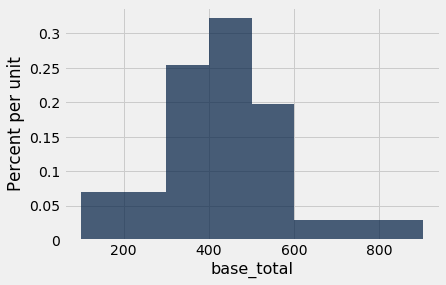

In [47]:
pokemon_table.hist('base_total', bins=make_array(100,300,400,500,600,901))

## Functions

In [48]:
def kg_to_lb(kg):
    """
    Converts a measurement in kg to lbs
    """
    return 2.20462*kg

In [49]:
kg_to_lb(100)

220.462

In [57]:
weight_lbs = pokemon_table.apply(kg_to_lb,'weight_kg')
weight_lbs

array([  1.52118780e+01,   2.86600600e+01,   2.20462000e+02,
         1.87392700e+01,   4.18877800e+01,   1.99518110e+02,
         1.98415800e+01,   4.96039500e+01,   1.88495010e+02,
         6.39339800e+00,   2.18257380e+01,   7.05478400e+01,
         7.05478400e+00,   2.20462000e+01,   6.50362900e+01,
         3.96831600e+00,   6.61386000e+01,   8.70824900e+01,
                    nan,              nan,   4.40924000e+00,
         8.37755600e+01,   1.52118780e+01,   1.43300300e+02,
         1.32277200e+01,              nan,              nan,
                    nan,   1.54323400e+01,   4.40924000e+01,
         1.32277200e+02,   1.98415800e+01,   4.29900900e+01,
         1.36686440e+02,   1.65346500e+01,   8.81848000e+01,
                    nan,              nan,   1.21254100e+01,
         2.64554400e+01,   1.65346500e+01,   1.21254100e+02,
         1.19049480e+01,   1.89597320e+01,   4.10059320e+01,
         1.19049480e+01,   6.50362900e+01,   6.61386000e+01,
         2.75577500e+01,

In [59]:
pokemon_table.with_column('weight_lbs',weight_lbs).select(['name','weight_kg','weight_lbs'])

name,weight_kg,weight_lbs
Bulbasaur,6.9,15.2119
Ivysaur,13,28.6601
Venusaur,100,220.462
Charmander,8.5,18.7393
Charmeleon,19,41.8878
Charizard,90.5,199.518
Squirtle,9,19.8416
Wartortle,22.5,49.6039
Blastoise,85.5,188.495
Caterpie,2.9,6.3934
